In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the CSV data
# file_path = '../../data/train/train_data.csv'
file_path = '../../data/sensor data/train_data.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the data
print(data.head())

   timestamp        Ax        Ay        Az  heart_rate  sleep_stage
0   0.000970 -0.234604  0.643829 -0.713974        65.0          0.0
1   0.020045 -0.233948  0.622269 -0.643692        65.0          0.0
2   0.040022 -0.239273  0.616257 -0.657822        65.0          0.0
3   0.059925 -0.209808  0.640320 -0.660721        65.0          0.0
4   0.079976 -0.224426  0.641098 -0.685638        65.0          0.0


In [6]:
# Dataset Info
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466942 entries, 0 to 1466941
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   timestamp    1466942 non-null  float64
 1   Ax           1466942 non-null  float64
 2   Ay           1466942 non-null  float64
 3   Az           1466942 non-null  float64
 4   heart_rate   1466942 non-null  float64
 5   sleep_stage  1466942 non-null  float64
dtypes: float64(6)
memory usage: 67.2 MB
None


In [8]:
# Convert columns to numeric (excluding Timestamp)
# sensor_columns = ['RED', 'IR', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Temperature']
# data[sensor_columns] = data[sensor_columns].apply(pd.to_numeric, errors='coerce')

columns = ['Ax', 'Ay', 'Az', 'heart_rate', 'sleep_stage']
data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

In [9]:
# Shape of the dataset 
print("\nDataset Shape (Rows, Columns):", data.shape)


Dataset Shape (Rows, Columns): (1466942, 6)


In [10]:
# Check for any missing values in the dataset
missing_data = data.isnull().sum()
print(missing_data)

timestamp      0
Ax             0
Ay             0
Az             0
heart_rate     0
sleep_stage    0
dtype: int64


In [11]:
# Check the data types of the columns
print(data.dtypes)

timestamp      float64
Ax             float64
Ay             float64
Az             float64
heart_rate     float64
sleep_stage    float64
dtype: object


In [12]:
 # Summary statistics for numerical columns
print(data.describe()) 

          timestamp            Ax            Ay            Az    heart_rate  \
count  1.466942e+06  1.466942e+06  1.466942e+06  1.466942e+06  1.466942e+06   
mean   1.470073e+04 -3.386235e-01 -6.722254e-02 -8.375997e-01  4.966649e+01   
std    8.501518e+03  1.272979e-01  2.858324e-01  2.812141e-01  4.469770e+00   
min    9.700000e-04 -1.790909e+00 -2.476578e+00 -2.687790e+00  4.300000e+01   
25%    7.326232e+03 -4.166410e-01 -2.444150e-01 -9.417110e-01  4.800000e+01   
50%    1.465190e+04 -3.217010e-01 -2.412400e-02 -9.118500e-01  4.900000e+01   
75%    2.207549e+04 -2.832950e-01  1.483920e-01 -8.592680e-01  5.000000e+01   
max    2.940000e+04  1.290283e+00  1.752090e+00  1.127075e+00  9.100000e+01   

        sleep_stage  
count  1.466942e+06  
mean   2.389093e+00  
std    1.597495e+00  
min    0.000000e+00  
25%    1.000000e+00  
50%    2.000000e+00  
75%    3.000000e+00  
max    5.000000e+00  



Correlation Matrix:


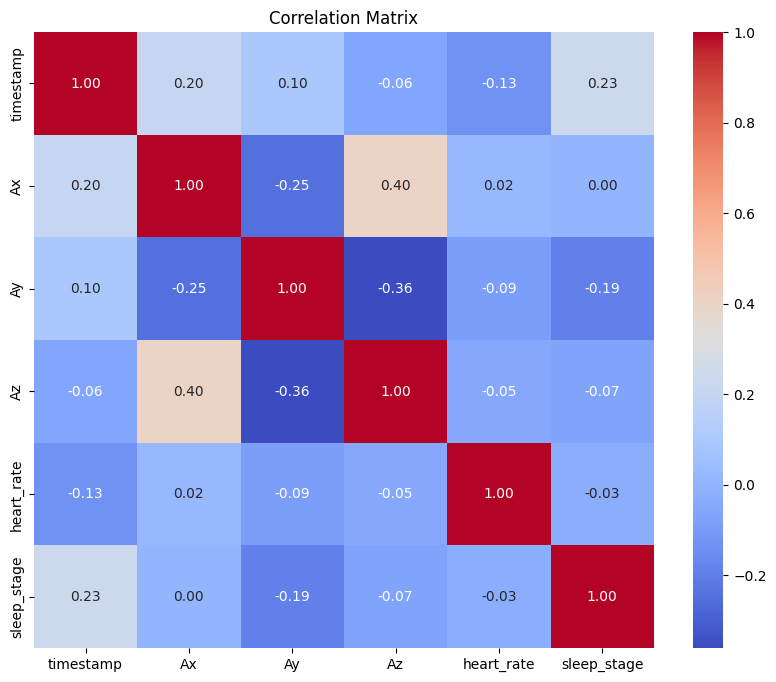

In [13]:
# ------------- Correlation Analysis -------------
# Calculate the correlation matrix
numeric_data = data.select_dtypes(include=np.number) # Only numeric columns
print("\nCorrelation Matrix:")
correlation = numeric_data.corr()
#print(correlation)  

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

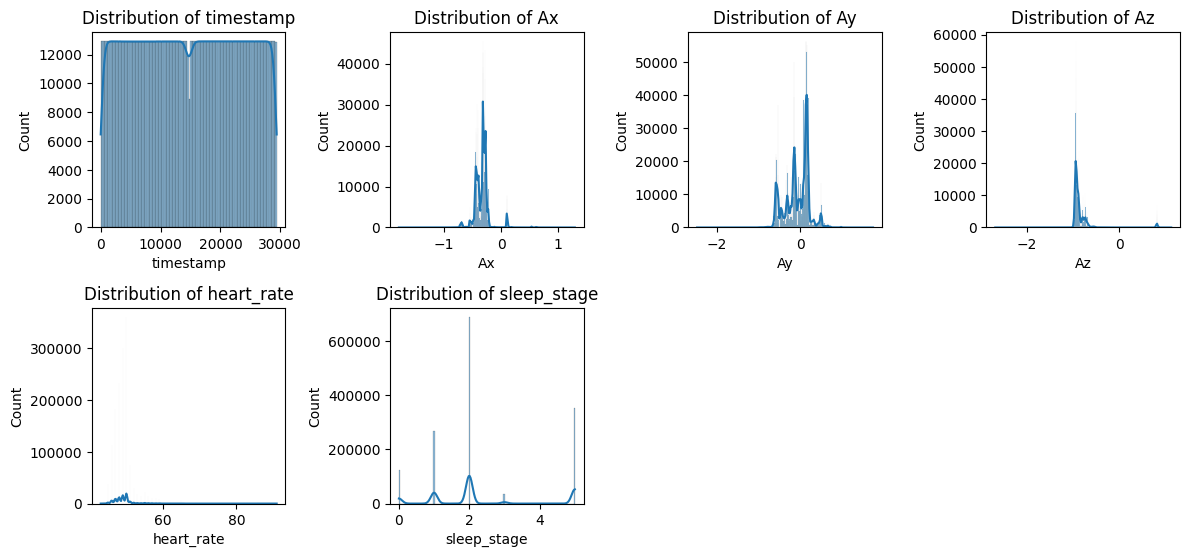

In [14]:
# ------------- Data Distribution ----------------
# Plotting histograms for each sensor's readings
numeric_columns = numeric_data.columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

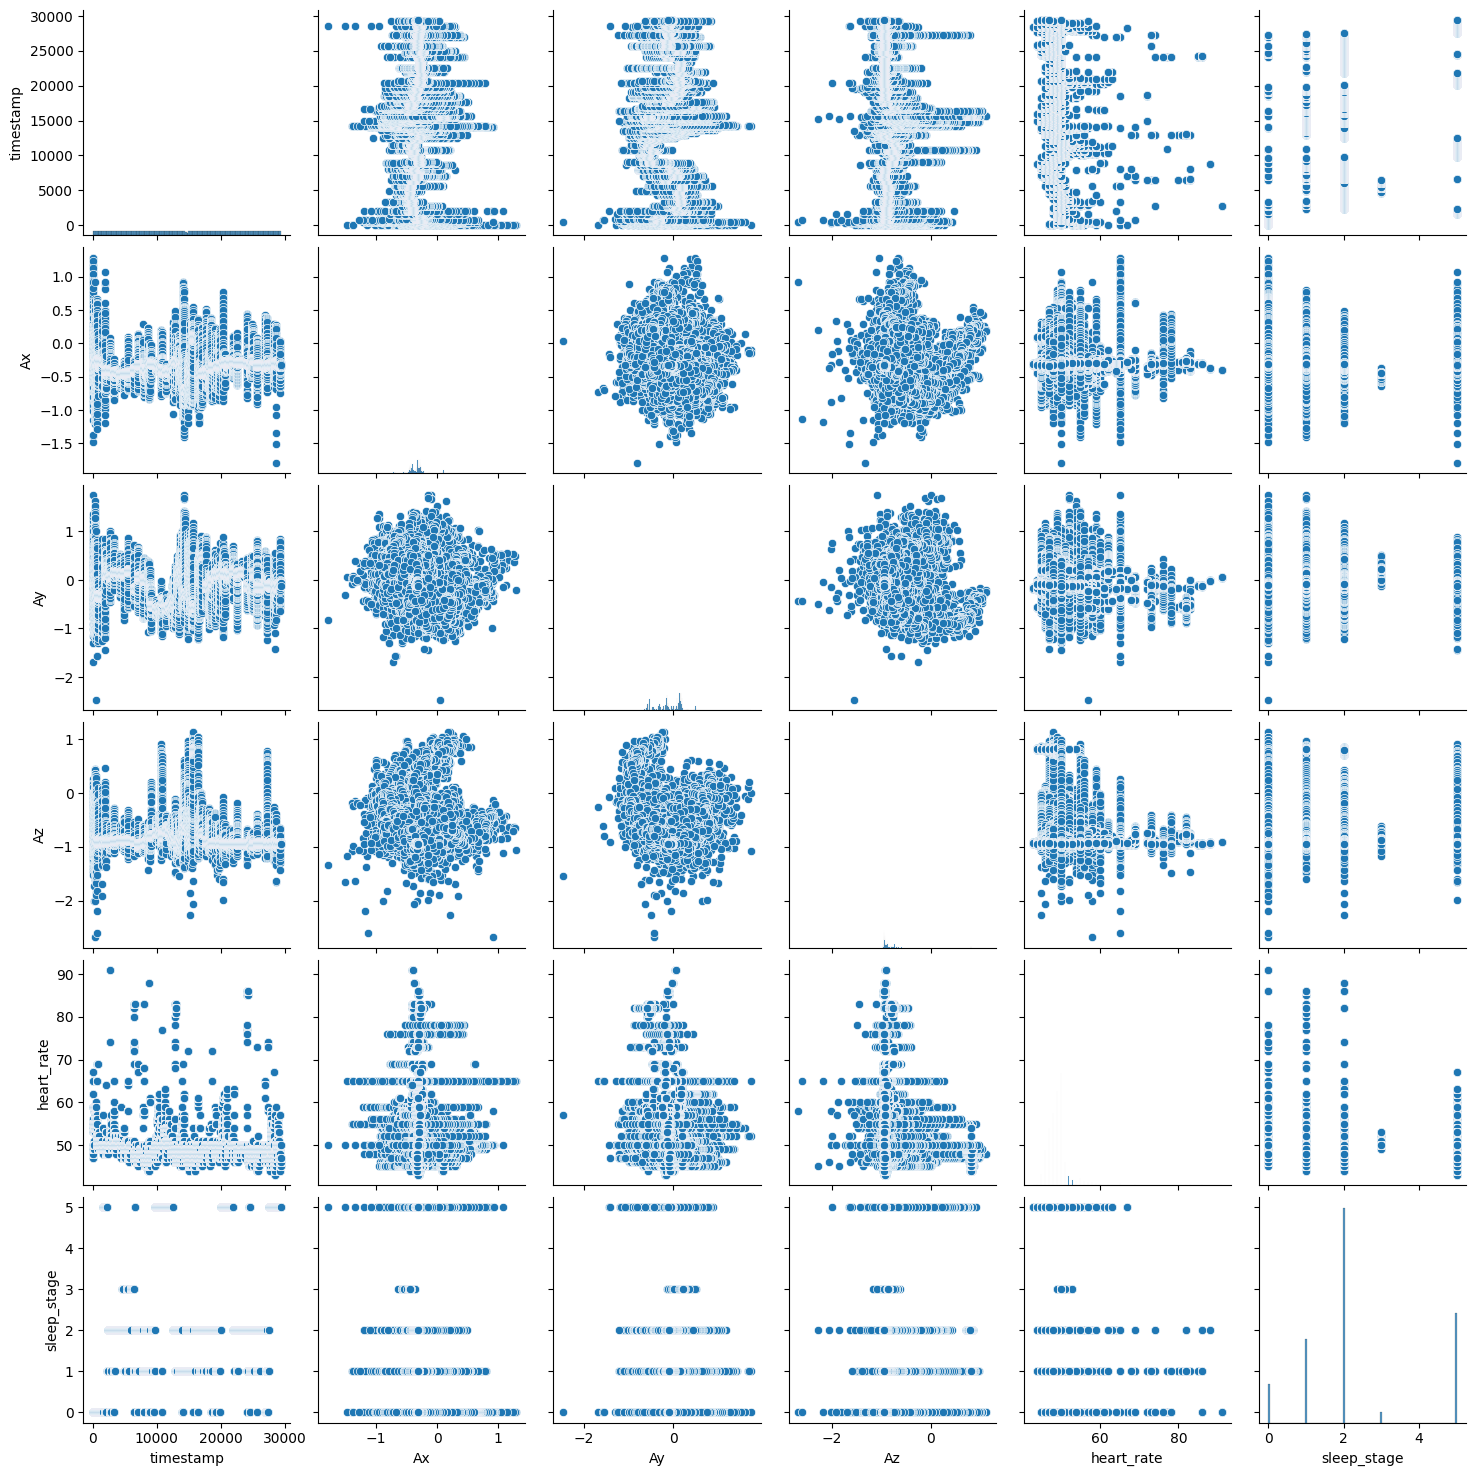

In [15]:
# ----------- Pairplot ------------
sns.pairplot(numeric_data)  
plt.show()

In [16]:
# --------------- Outlier Detection ----------------
# Detect outliers using the IQR method for each numerical feature
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected:")
print(outliers)


Outliers detected:
timestamp           0
Ax              74028
Ay               4443
Az             174735
heart_rate     122700
sleep_stage         0
dtype: int64


In [17]:
# -------------------- Data Normalization --------------------
# Normalize the numeric data using StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()  # Make a copy to avoid altering the original
data_scaled[numeric_columns] = scaler.fit_transform(numeric_data)

# Show a few rows of scaled data
print("\nScaled Data (first 5 rows):")
print(data_scaled.head())


Scaled Data (first 5 rows):
   timestamp        Ax        Ay        Az  heart_rate  sleep_stage
0  -1.729189  0.817135  2.487653  0.439614    3.430494    -1.495525
1  -1.729187  0.822288  2.412224  0.689538    3.430494    -1.495525
2  -1.729184  0.780457  2.391191  0.639292    3.430494    -1.495525
3  -1.729182  1.011922  2.475377  0.628983    3.430494    -1.495525
4  -1.729180  0.897089  2.478098  0.540378    3.430494    -1.495525


In [18]:
# -------------------- Save Exploratory Results --------------------

# Create a buffer to handle output from data.info(); which otherwise saves 'None'
import io

buffer = io.StringIO() # Create a StringIO buffer to capture the printed output
data.info(buf=buffer) # Redirect the output of data.info() to the buffer
info_str = buffer.getvalue() # Get the string from the buffer

# Save a summary of the data exploration into a file
with open("data_exploration_summary.txt", "w") as f:
    f.write("Basic Information:\n")
    f.write(info_str + "\n\n")
    f.write("Missing Values:\n")
    f.write(str(missing_data) + "\n\n")
    f.write("Descriptive Statistics:\n")
    f.write(str(numeric_data.describe()) + "\n\n")
    f.write("Correlation Matrix:\n")
    f.write(str(correlation) + "\n\n")
    f.write("Outlier Detection:\n")
    f.write(str(outliers) + "\n\n")

print("\nData exploration completed. Check the visualizations and the 'data_exploration_summary.txt' file.")


Data exploration completed. Check the visualizations and the 'data_exploration_summary.txt' file.
